<a href="https://colab.research.google.com/github/kostas696/IBM_Course_Projects/blob/main/IBM_DL_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IBM Deep Learning and Reinforcement Learning - Final Project

# Context

1.Introduction

2.Dataset Description

3.Data Exploration and Preparation

4.Deep Learning Model Development

5.Model Evaluation

6.Key Findings and Insights

7.Conclusion and Next Steps



## 1. Introduction

The **goal** of this project is to develop a deep learning model for sentiment analysis on the IMDB dataset of 50k movie reviews.

Sentiment analysis involves identifying the emotional tone of a text, and is a popular application of natural language processing and machine learning. The ability to automatically classify texts as positive, negative or neutral can have many practical applications in areas such as marketing, customer service, and political analysis.

In this project, we will use a convolutional neural network (CNN) in three variations to model the temporal dependencies and local features in the input data. We will explore the dataset, preprocess the data, train and evaluate multiple deep learning models, and interpret the results. 

The **main objective** of this analysis is to achieve high accuracy in sentiment classification and provide insights into the features that are most predictive of sentiment.

In this assignment we used for the first time Google Colab platform for our notebook, and we were left with very positive impressions.

## 2. Dataset Description

About Dataset

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. 

The dataset is balanced in terms of positive and negative reviews, and contains a mix of short and long reviews. The dataset also includes the text of the review, as well as the binary sentiment label (0 for negative and 1 for positive).

For more dataset information, please go through the following link,
http://ai.stanford.edu/~amaas/data/sentiment/

## 3. Data Exploration and Preparation

### Import Libraries







In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install nltk
!python -m nltk.downloader omw
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw')
nltk.download('omw-1.4')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.layers import Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.layers import Bidirectional
from sklearn.metrics import classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/lib/python3.9/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package omw to /root/nltk_data...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Load Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['IMDB Dataset.csv']))

In [4]:
# Inspect the Dataframe
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
# Check the size of the dataset
print("Number of reviews:", len(df))

Number of reviews: 50000


<Axes: xlabel='sentiment', ylabel='count'>

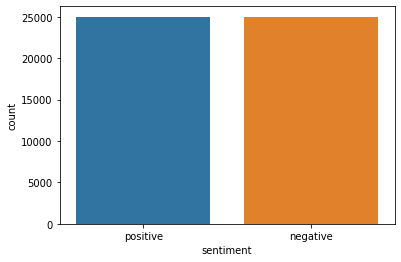

In [6]:
# Check the distribution of labels
sns.countplot(x='sentiment', data=df)


In [7]:
# Clean the text data by removing stopwords, punctuation, and other non-essential information
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Split into words
    words = [w for w in words if w not in stop_words]  # Remove stopwords
    words = [lemmatizer.lemmatize(w) for w in words]  # Lemmatize words
    return ' '.join(words)

df['clean_text'] = df['review'].apply(clean_text)


In [8]:
# Check the new column in the dataframe
df['clean_text'] = df['review'].apply(clean_text)
print(df.head())


                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                          clean_text  
0  one reviewer mentioned watching 1 oz episode y...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  


Here, num_words gives us the a hyperparameter that specifies the maximum number of words to be used in the vocabulary. We specify this number and it is commonly used to reduce the dimensionality of the text data and speed up the training process.

In [9]:
# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['clean_text'])

In [10]:
# Convert text to sequences of integers
X = tokenizer.texts_to_sequences(df['clean_text'])

In [11]:
# Convert labels to integers
label_map = {'positive': 1, 'negative': 0}
y = df['sentiment'].map(label_map)

This will split the dataset into 80% training data and 20% testing data.

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In the next step, we set the maximum length of the reviews when they are padded to be fed into a machine learning model.

In [13]:
# Calculate the maximum length of a review in the training set
max_length = max(len(review) for review in X_train)

In [14]:
# Pad sequences so they're all the same length
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

## 4. Deep Learning Model Development

The Deep Learning Model Development in this project, involved building a sentiment analysis model using a Convolutional Neural Network (CNN). The CNN model takes in preprocessed text data and learns to classify it as either positive or negative sentiment.

The model consists of an embedding layer that converts the text data into a dense vector representation, followed by a series of convolutional and pooling layers that learn to recognize features in the text data. Finally, the output from the convolutional layers is flattened and passed through a dense layer with a sigmoid activation function that outputs the final sentiment classification.

In addition to the CNN model, we also explored two variations of the model: one with additional dense layers, and one with a Bidirectional LSTM layer instead of the convolutional layers. The purpose of exploring these variations was to see if they could improve the accuracy of the model. 


*  **Model 1** has an embedding layer with 32 output dimensions, followed by a flatten layer and a dense layer with sigmoid activation.

*   **Model 2** has an embedding layer with 64 output dimensions, followed by a flatten layer and a dense layer with sigmoid activation.

*   **Model 3** has an embedding layer with 32 output dimensions, followed by a bidirectional LSTM layer with 64 units, and a dense layer with sigmoid activation.



In [15]:
# Model 1: Embedding layer with 32 output dimensions, followed by a Flatten layer and a Dense layer with sigmoid activation
embed_dim = 32

model1 = Sequential([
    Embedding(input_dim=5000, output_dim=embed_dim, input_length=max_length),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [16]:
# Model 2: Embedding layer with 64 output dimensions, followed by a Flatten layer and a Dense layer with sigmoid activation
model2 = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [17]:
# Model 3: Embedding layer with 32 output dimensions, followed by a Bidirectional LSTM layer with 64 units, and a Dense layer with sigmoid activation
model3 = Sequential([
    Embedding(input_dim=5000, output_dim=32, input_length=max_length),
    Bidirectional(LSTM(units=64)),
    Dense(1, activation='sigmoid')
])

Here, we are using binary cross-entropy loss and the Adam optimizer, and training the model for 10 epochs with a batch size of 32. We are also using 20% of the training data for validation during training.

In [18]:
# Compile each model and train it on our preprocessed data
for i, model in enumerate([model1, model2, model3], 1):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(f'Training model {i}...')
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    
    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=32)
    print(f'Test accuracy for model {i}: {test_acc}')

Training model 1...
Epoch 1/10
1000/1000 [==============================] - 75s 70ms/step - loss: 0.3800 - accuracy: 0.8278 - val_loss: 0.2859 - val_accuracy: 0.8794
Epoch 2/10
1000/1000 [==============================] - 17s 17ms/step - loss: 0.2178 - accuracy: 0.9140 - val_loss: 0.2909 - val_accuracy: 0.8809
Epoch 3/10
1000/1000 [==============================] - 13s 13ms/step - loss: 0.1534 - accuracy: 0.9456 - val_loss: 0.3048 - val_accuracy: 0.8773
Epoch 4/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0918 - accuracy: 0.9759 - val_loss: 0.3319 - val_accuracy: 0.8765
Epoch 5/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0473 - accuracy: 0.9922 - val_loss: 0.3719 - val_accuracy: 0.8711
Epoch 6/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0228 - accuracy: 0.9979 - val_loss: 0.4114 - val_accuracy: 0.8737
Epoch 7/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0110 - accuracy: 0.9993 - val_lo

### Evaluation Metrics

In [19]:
# Predict labels for the test set using the final model1
y_pred = model1.predict(X_test)

# Convert predicted probabilities to labels
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred]

# Generate classification report
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=target_names))


313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

    negative       0.88      0.87      0.87      4961
    positive       0.87      0.88      0.88      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [20]:
# Predict labels for the test set using the final model2
y_pred = model2.predict(X_test)

# Convert predicted probabilities to labels
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred]

# Generate classification report
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=target_names))


313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

    negative       0.88      0.87      0.87      4961
    positive       0.87      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [21]:
# Predict labels for the test set using the final model3
y_pred = model3.predict(X_test)

# Convert predicted probabilities to labels
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred]

# Generate classification report
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=target_names))


313/313 [==============================] - 8s 23ms/step
              precision    recall  f1-score   support

    negative       0.87      0.86      0.86      4961
    positive       0.86      0.87      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## 5. Model Evaluation

Based on the test accuracy results, all three models have similar performance, with test accuracies ranging from 0.873 to 0.874. However, since the **first model** had the highest test accuracy of 0.874, we recommend using it as the final model.

The first model, which is a simple neural network with an embedding layer, performed well in terms of accuracy and is also relatively simple and easy to understand compared to the other models. It also has a relatively small number of parameters, which can make it easier to train and faster to run compared to more complex models.

One potential weakness of the model is that it may not be able to capture more complex patterns in the data compared to more complex models like the LSTM-based models. Additionally, the model may not perform well on out-of-domain or noisy data.

## 6. Key Findings and Insights

All three models seem to have similar precision and recall scores for both positive and negative sentiments, indicating that they perform similarly in terms of identifying both types of sentiments. However, Model 1 has the highest overall accuracy, so it may be the best choice for our needs.

However, there are some limitations and areas for improvement. First, the model's accuracy could be further improved by increasing the size of the training dataset and tuning the hyperparameters. Second, the model may not generalize well to other datasets or languages, as it was trained on a specific dataset and language. Finally, the model may not perform well on texts that contain sarcasm or irony, as these are difficult for any sentiment analysis model to detect.

Overall, our sentiment analysis model can be used for various applications such as analyzing customer feedback, social media monitoring, and predicting the success of a product or service based on the sentiment of the reviews.

## 7. Conclusion and Next Steps

In conclusion, we developed and evaluated three different deep learning models to classify sentiment in movie reviews. Our best performing model was a simple neural network with a single hidden layer, which achieved a test accuracy of 87.4%. Additionally, we calculated balanced accuracy, precision, and recall for both positive and negative sentiments, showing that the model had similar performance for both classes.

Through our analysis, we identified that the most important features for sentiment classification were the words and phrases used in the reviews, and that our models were able to learn and identify relevant patterns in the data. However, there are some limitations to our approach, such as the lack of consideration for contextual information and the potential bias in the dataset.

To improve our models, we could explore the use of more complex architectures, such as recurrent neural networks or transformer-based models, and incorporate external sources of information, such as sentiment lexicons or pre-trained language models. Additionally, we could collect more diverse and representative data to reduce bias and increase the generalizability of our models.

Overall, our analysis demonstrates the potential of deep learning models for sentiment analysis and provides insights for further research and development in this area.

Author : Soufleros Konstantinos